In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 1506 images belonging to 3 classes.


In [29]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [30]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [31]:
count = 0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.7211162  0.7171946  0.7720966 ]
  [0.7367718  0.73285025 0.7877522 ]
  [0.7473158  0.74339426 0.7982962 ]
  ...
  [0.57443357 0.56266886 0.6293355 ]
  [0.57565945 0.56389475 0.6305614 ]
  [0.5768854  0.5651207  0.63178736]]

 [[0.72013545 0.7162138  0.77111584]
  [0.735791   0.73186946 0.7867714 ]
  [0.7478062  0.7438846  0.7987866 ]
  ...
  [0.59474146 0.58297676 0.6496434 ]
  [0.5964578  0.5846931  0.65135974]
  [0.59817415 0.58640945 0.6530761 ]]

 [[0.71915466 0.7152331  0.77013505]
  [0.73481023 0.73088866 0.7857906 ]
  [0.74829656 0.744375   0.79927695]
  ...
  [0.6217772  0.6100125  0.6766792 ]
  [0.62324834 0.61148363 0.6781503 ]
  [0.62471944 0.61295474 0.6796214 ]]

 ...

 [[0.51798517 0.5022989  0.5611224 ]
  [0.5167592  0.50107294 0.55989647]
  [0.51553327 0.499847   0.5586706 ]
  ...
  [0.45737734 0.4495342  0.5005146 ]
  [0.51921344 0.5042656  0.5587984 ]
  [0.4864988  0.47081253 0.5257145 ]]

 [[0.49841568 0.4827294  0.54155296]
  [0.49718976 0.4815035  0.54032695]


In [4]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip = True)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = "sparse"
)

Found 215 images belonging to 3 classes.


In [5]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip = True)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = "sparse"
)

Found 431 images belonging to 3 classes.


In [6]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [8]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [9]:
1506/32

47.0625

In [10]:
215/32

6.71875

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch = 47,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 1,
    epochs = 20
)

Epoch 1/20


47/47 [==============================] - 125s 3s/step - loss: 0.8922 - accuracy: 0.4987 - val_loss: 0.8462 - val_accuracy: 0.6875
Epoch 2/20
47/47 [==============================] - 118s 2s/step - loss: 0.6105 - accuracy: 0.7483 - val_loss: 0.6495 - val_accuracy: 0.7448
Epoch 3/20
47/47 [==============================] - 117s 2s/step - loss: 0.4224 - accuracy: 0.8270 - val_loss: 0.2946 - val_accuracy: 0.9062
Epoch 4/20
47/47 [==============================] - 117s 2s/step - loss: 0.2480 - accuracy: 0.9043 - val_loss: 0.2137 - val_accuracy: 0.8958
Epoch 5/20
47/47 [==============================] - 117s 2s/step - loss: 0.2091 - accuracy: 0.9159 - val_loss: 0.3224 - val_accuracy: 0.8854
Epoch 6/20
47/47 [==============================] - 118s 2s/step - loss: 0.1527 - accuracy: 0.9389 - val_loss: 0.1428 - val_accuracy: 0.9479
Epoch 7/20
47/47 [==============================] - 117s 2s/step - loss: 0.1707 - accuracy: 0.9369 - val_loss: 0.2160 - val_accuracy: 0.9115
Epoch 8/20


In [12]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 16s 1s/step - loss: 0.0727 - accuracy: 0.9722


In [13]:
scores

[0.07268146425485611, 0.9721577763557434]

In [14]:
history

In [15]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
type(history.history['loss'])

list

In [18]:
len(history.history['loss'])

20

In [19]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.892163872718811,
 0.6104711294174194,
 0.42235273122787476,
 0.24797844886779785,
 0.2091342657804489]

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
val_acc

[0.6875,
 0.7447916865348816,
 0.90625,
 0.8958333134651184,
 0.8854166865348816,
 0.9479166865348816,
 0.9114583134651184,
 0.9270833134651184,
 0.9375,
 0.96875,
 0.9114583134651184,
 0.953125,
 0.984375,
 0.9635416865348816,
 0.96875,
 0.9791666865348816,
 0.9583333134651184,
 0.9583333134651184,
 0.9947916865348816,
 0.9635416865348816]

In [22]:
acc

[0.49867022037506104,
 0.7483039498329163,
 0.8270013332366943,
 0.9043419361114502,
 0.9158751964569092,
 0.9389416575431824,
 0.9369063973426819,
 0.9016281962394714,
 0.9531885981559753,
 0.972862958908081,
 0.8975576758384705,
 0.9547872543334961,
 0.9715061187744141,
 0.9803256392478943,
 0.9782903790473938,
 0.9850746393203735,
 0.9796472191810608,
 0.975576639175415,
 0.9721845388412476,
 0.9911804795265198]

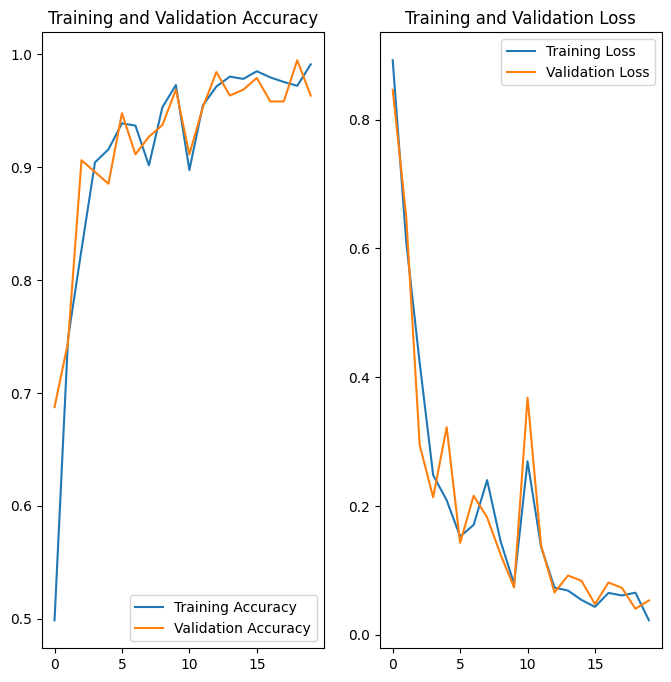

In [23]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 696ms/step
predicted label: Potato___Early_blight


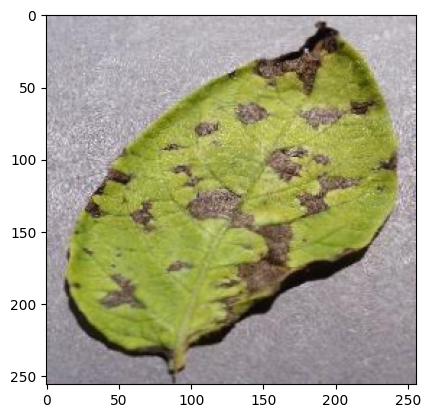

In [33]:
import numpy as np


for image_batch, labels_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 47ms/step


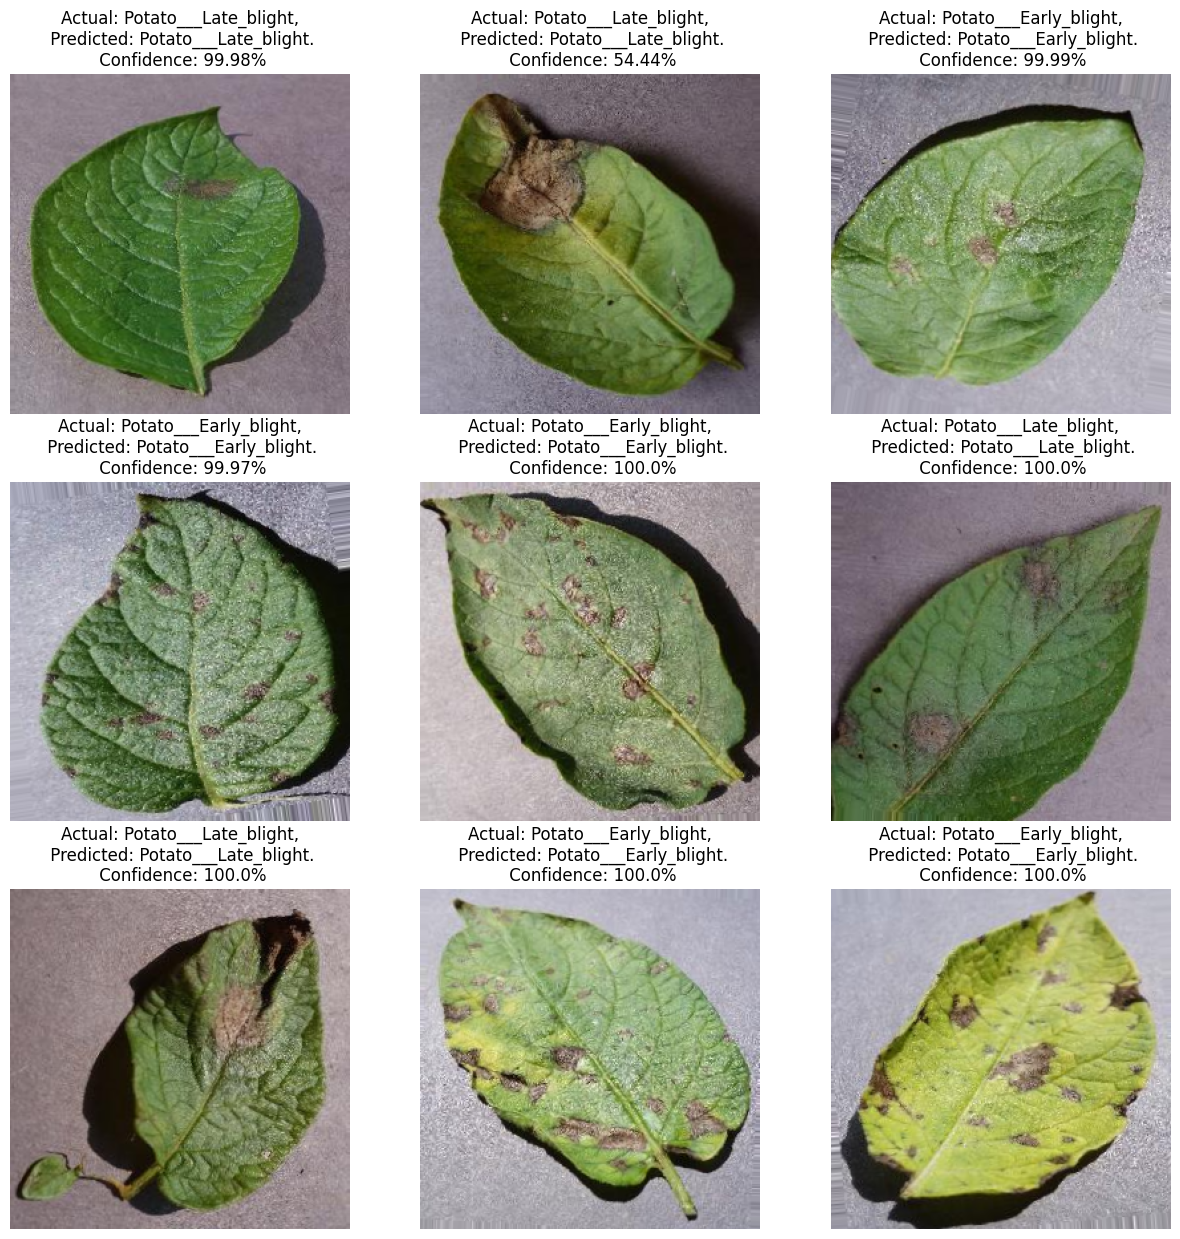

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [36]:
model.save("../potatoes.h5")

C:\Users\Asmamaw\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
